# Infraestrutura

**1. Você está rodando em Python 3.9+**

In [1]:
!python --version

Python 3.11.9


**2. Você está usando um ambiente virtual: Virtualenv ou Anaconda**

Resposta: foi criado ambiente virtual usando Venv. O código abaixo mostra que o ambiente foi criado e o diretório dele:

In [2]:
import sys
import os

def get_venv_info():
    # Verificar se está sendo acessado o ambiente virtual
    in_venv = (
        hasattr(sys, 'real_prefix') or
        (hasattr(sys, 'base_prefix') and sys.base_prefix != sys.prefix)
    )

    # Verificar se o gerador de ambiente virtual é o Venv
    venv_marker = os.path.isfile(os.path.join(sys.prefix, 'pyvenv.cfg'))

    if in_venv and venv_marker:
        return {
            "is_venv": True,
            "venv_path": sys.prefix
        }
    else:
        return {
            "is_venv": False,
            "venv_path": None
        }

info = get_venv_info()
print("Is venv:", info["is_venv"])
print("Venv path:", info["venv_path"])

Is venv: True
Venv path: c:\Users\Kleber\Documents\curso_intel_artificial\validacao_clusterizacao\pd_validacao_clusterizacao_virtual


**3. Todas as bibliotecas usadas nesse exercícios estão instaladas em um ambiente virtual específico**

Resposta: o código abaixo mostra que as bibliotecas estão instaladas no ambiente virtual.

In [3]:
import sys
import subprocess
print("Ambiente virtual: " + sys.prefix)
result = subprocess.run(['pip', 'list'], capture_output=True, text=True)
output = result.stdout
packages = [
    line.split()
    for line in output.strip().split('\n')[2:] 
]
print("Lista de bibliotecas instaladas no ambiente virtual:")
for name, version in packages:
    print(f"{name} → {version}")
print("Quantidade de bibliotecas instaladas no ambiente virtual: " + 
      str(len(packages)))

Ambiente virtual: c:\Users\Kleber\Documents\curso_intel_artificial\validacao_clusterizacao\pd_validacao_clusterizacao_virtual
Lista de bibliotecas instaladas no ambiente virtual:
anyio → 4.11.0
argon2-cffi → 25.1.0
argon2-cffi-bindings → 25.1.0
arrow → 1.4.0
asttokens → 3.0.1
async-lru → 2.0.5
attrs → 25.4.0
babel → 2.17.0
beautifulsoup4 → 4.14.2
bleach → 6.3.0
certifi → 2025.11.12
cffi → 2.0.0
charset-normalizer → 3.4.4
colorama → 0.4.6
comm → 0.2.3
contourpy → 1.3.3
cycler → 0.12.1
debugpy → 1.8.17
decorator → 5.2.1
defusedxml → 0.7.1
executing → 2.2.1
fastjsonschema → 2.21.2
fonttools → 4.60.1
fqdn → 1.5.1
h11 → 0.16.0
httpcore → 1.0.9
httpx → 0.28.1
idna → 3.11
ipykernel → 7.1.0
ipython → 9.7.0
ipython_pygments_lexers → 1.1.1
ipywidgets → 8.1.8
isoduration → 20.11.0
jedi → 0.19.2
Jinja2 → 3.1.6
joblib → 1.5.2
json5 → 0.12.1
jsonpointer → 3.0.0
jsonschema → 4.25.1
jsonschema-specifications → 2025.9.1
jupyter → 1.1.1
jupyter_client → 8.6.3
jupyter-console → 6.6.3
jupyter_core → 5.9.1

**4. Gere um arquivo de requerimentos (requirements.txt) com os pacotes necessários. É necessário se certificar que a versão do pacote está disponibilizada.**

Resposta:

In [1]:
!pip freeze > requirements.txt

**5. Tire um printscreen do ambiente que será usado rodando em sua máquina.**

![](ambiente_virtual.png)

**6. Disponibilize os códigos gerados, assim como os artefatos acessórios (requirements.txt) e instruções em um repositório GIT público. (se isso não for feito, o diretório com esses arquivos deverá ser enviado compactado no moodle).**

Resposta: https://github.com/kleberga/pd_validacao_clusterizacao

# Escolha de base de dados

**1. Escolha uma base de dados para realizar o trabalho. Essa base será usada em um problema de clusterização.**

Resposta: a base de dados escolhida foi a base de dados sócio-econômicos e de saúde que determinam o índice de desenvolvimento dos países. A base está disponível no Kaggle por meio da seguinte URL: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data

**2. Escreva a justificativa para a escolha de dados, dando sua motivação e objetivos.**


Resposta: a base escolhida foi utilizada no PD da disciplina "Algoritmos de Inteligência Artificial para clusterização [25E4_2]". Agora, há a possibilidade de ser aplicar novos conhecimentos na clusterização destes dados, como a escolha ótima de clusters e medidas de validação, gerando melhores modelos e aprimorando o trabalho realizado na disciplina anterior.

**3. Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?**

Resposta: o código abaixo verifica se há valores faltando e o formato das variáveis.

In [5]:
# Importação das bibliotecas
import kagglehub
import pandas as pd

# Baixar o arquivo
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")

# carregar o arquivo
paises = pd.read_csv(path + "/Country-data.csv")

# verificar se há valores faltando
print(paises.isnull().any())

# verificar o formato das variáveis
print(paises.info())

paises.head()

country       False
child_mort    False
exports       False
health        False
imports       False
income        False
inflation     False
life_expec    False
total_fer     False
gdpp          False
dtype: bool
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Continuação da resposta: o código abaixo gera o gráfico box-plot com a faixa dinâmica das variáveis.

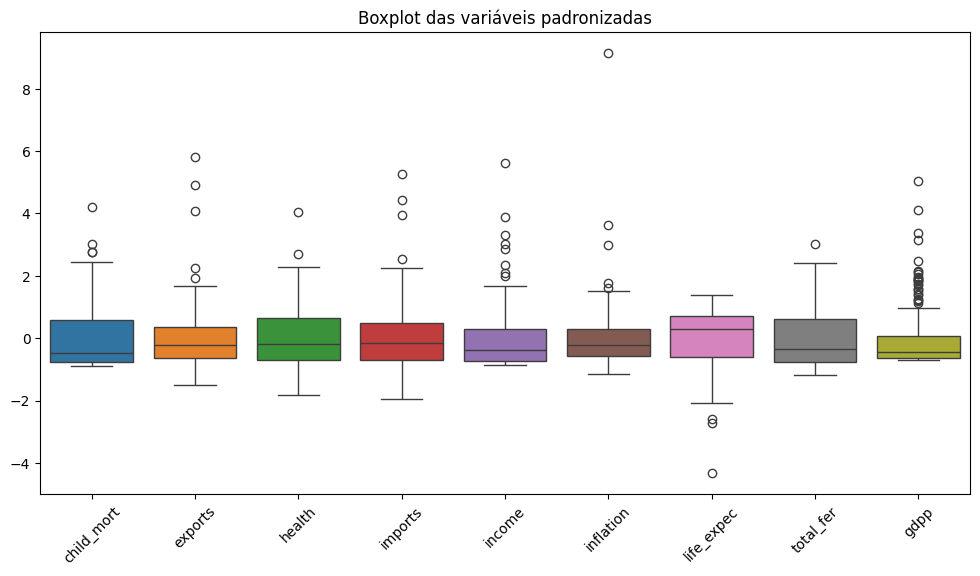

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Remover a coluna 'country' para focar nas variáveis numéricas
paises_numeric = paises.drop(columns=['country'])

# Padronizar os dados
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(paises_numeric), 
                         columns=paises_numeric.columns)

# Plotar boxplot com dados padronizados
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_scaled)
plt.xticks(rotation=45)
plt.title('Boxplot das variáveis padronizadas')
plt.show()

Continuação da resposta: o código abaixo mostra a quantidade de outliers em cada variável.

In [7]:
# método do Intervalo Interquartil (IQR) para detecção de outliers
outliers = pd.DataFrame()

for column in paises_numeric.columns:
    Q1 = paises_numeric[column].quantile(0.25)
    Q3 = paises_numeric[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar outliers
    outlier_mask = (paises_numeric[column] < lower_bound) | (paises_numeric[column] > upper_bound)
    outliers[column] = outlier_mask

# Mostrar quantos outliers existem por variável
print(outliers.sum())

child_mort     4
exports        5
health         2
imports        4
income         8
inflation      5
life_expec     3
total_fer      1
gdpp          25
dtype: int64


Continuação da resposta: o código abaixo mostra quais são os outliers.

In [8]:
# mostrar os outliers, a fim de verificar se não são algum erro de digitação
outliers_por_coluna = {}

for column in paises_numeric.columns:
    Q1 = paises_numeric[column].quantile(0.25)
    Q3 = paises_numeric[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar os outliers
    outlier_mask = (paises_numeric[column] < lower_bound) | (paises_numeric[column] > upper_bound)

    # Criar um DataFrame com país e valor do outlier
    outliers_df = paises.loc[outlier_mask, ["country", column]]
    outliers_por_coluna[column] = outliers_df

# Exibir os outliers por variável
for column, df in outliers_por_coluna.items():
    print(f"\nOutliers em '{column}':")
    print(df)


Outliers em 'child_mort':
                      country  child_mort
31   Central African Republic       149.0
32                       Chad       150.0
66                      Haiti       208.0
132              Sierra Leone       160.0

Outliers em 'exports':
        country  exports
73      Ireland    103.0
91   Luxembourg    175.0
98        Malta    153.0
131  Seychelles     93.8
133   Singapore    200.0

Outliers em 'health':
                   country  health
101  Micronesia, Fed. Sts.    14.2
159          United States    17.9

Outliers em 'imports':
        country  imports
91   Luxembourg    142.0
98        Malta    154.0
131  Seychelles    108.0
133   Singapore    174.0

Outliers em 'income':
                  country  income
23                 Brunei   80600
82                 Kuwait   75200
91             Luxembourg   91700
114                Norway   62300
123                 Qatar  125000
133             Singapore   72100
145           Switzerland   55500
157  United Arab 

Continuação da resposta: 

Antes da etapa de clusterização, é necessário:
1. Verificar se há valores faltando (*missings*). Se houver, deve ser adotado algum procedimento para removê-los, como excluir a instância com o valor faltando ou preenchê-lo com a média das demais instâncias, por exemplo;
2. Verificar se há *outliers*. Se houver, verificar se o mesmo deve ser tratado, como substituí-lo pela média ou excluí-lo, por exemplo. Também pode ser decidido manter os *outliers* sem alteração; 
3. Verificar se as variáveis que serão utilizadas na clusterização estão no formato numérico. Se não estiverem, é necessário transformá-las; e
4. Colocar todas as variáveis na mesma escala, caso não estejam.

Por meio dos resultados mostrados anteriormente, foram identificadas as seguintes características na base de dados deste estudo:
1. As variáveis estão em escalas diferentes;
2. Não há valores faltantes (*missings*);
3. Com exceção do nome do país, as demais variáveis estão no formato numérico, o que é necessário para a clusterização; e
4. Todas as variáveis possuem *outliers*. Contudo, foi identificado que os *outliers* não aparentam ser erros de digitação, mas características dos países, que naturalmente são discrepantes entre si.



**4. Realize o pré-processamento adequado dos dados. Descreva os passos necessários.**

Resposta: conforme o código abaixo, o pré-processamento consiste em:

1. Eescalonar os dados; e
2. Transformá-los de novo em DataFrame.

In [9]:
from sklearn.preprocessing import StandardScaler

# Escalonar os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(paises_numeric)

# Converter de volta para DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=paises_numeric.columns)

# Visualizar os dados escalados
print(df_scaled.head())

   child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   

   total_fer      gdpp  
0   1.902882 -0.679180  
1  -0.859973 -0.485623  
2  -0.038404 -0.465376  
3   2.128151 -0.516268  
4  -0.541946 -0.041817  


# Clusterização

**1. Realizar o agrupamento dos dados, escolhendo o número ótimo de clusters. Para tal, use o índice de silhueta e as técnicas:**
1. **K-Médias**
2. **DBScan**

Resposta: o código abaixo busca identificar o número ótimo de clusters com o Índice de Silhueta para o algoritmo K-Médias. O resultado obtido indicou 5 clusters, o qual gera o Índice de Silhueta de 0,30.

In [64]:
# carregar as bibliotecas
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# valor de inicio da range de min_samples
valor_inicio = 2

# valor final da range de min_samples
valor_final = 11

# range de busca
range_busca = range(valor_inicio, valor_final)

# criar uma lista com os resultados do K-Médias para diferentes valores de K
clusters_list = [
    KMeans(n_clusters=k, random_state=42).fit(df_scaled) for k in range_busca
]

# calcular o índice de silhueta para os resultados gerados do K-Médias
silhouette_list_kmeans = [
    silhouette_score(df_scaled, cluster_model.labels_) for cluster_model in clusters_list
]

# filtrar o maior valor
maior_valor_kmedias = {"n_cluters": '', 'score': -1}
for indice, valor in enumerate(silhouette_list_kmeans):
    if valor > maior_valor_kmedias['score']:
        maior_valor_kmedias['score'] = valor
        maior_valor_kmedias['n_cluters'] = indice+valor_inicio

# número ótimo de clusters e maior índice de silhueta
print(f'Valor ótimo de clusters para o K-Médias: {maior_valor_kmedias}')

# calcular a clusterização pelo K-Médias com o número ótimo de clusters
valor_otimo_kmedias = KMeans(n_clusters=maior_valor_kmedias['n_cluters'], random_state=42).fit(df_scaled)

Valor ótimo de clusters para o K-Médias: {'n_cluters': 5, 'score': 0.30088229124112015}


Continuação da resposta: o código abaixo busca identificar os valores ótimos de 'min_samples' e 'eps' para o DBScan. Os valores ótimos identificados foram 5 e 1,35, respectivamente, o que gera o Índice de Silhueta de 0,21.

In [65]:
# importar as bibliotecas
import numpy as np
from sklearn.cluster import DBSCAN

# gerar o vetor de eps para busca em grid
eps_valores = np.linspace(0.05, 5.0, 100)

# gerar o vetor de min_samples para busca em grid
min_samples_valores = range(2, (int(np.log(df_scaled.shape[0])) + 1), 1)

# criar uma lista vazia
parametros = []

# preencher a lista com um dicionário de eps e min_samples
for eps in eps_valores:
  for min_samples in min_samples_valores:
    parametros.append({
        'eps': eps,
        'min_samples': min_samples
    })

# criar uma lista vazia
silhouette_list_dbscan = []

# aplicar o DBScan para cada eps e min_sample
for param in parametros:

  eps = param['eps']
  min_samples = param['min_samples']

  dbscan_model = DBSCAN(eps=eps, min_samples=min_samples).fit(df_scaled)
  labels = dbscan_model.labels_

  dbscan_model.leaf_size

  n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

  # verificar se há mais de 1 label e se o número de clusters gerados é maior que 1
  if len(set(labels)) > 1 and n_clusters > 1:
    score = silhouette_score(df_scaled, labels)
    silhouette_list_dbscan.append({'eps': eps, 'min_samples': min_samples, 'score': score, 'n_clusters': n_clusters})

# ordenar os 10 melhores resultados
melhores = sorted(silhouette_list_dbscan, key=lambda x: x['score'], reverse=True)[:10]

print(f'Valores ótimos de eps e min_samples para o DBScan: {melhores[0]}')

# gerar a clusterização com a melhor combinação de eps e min_samples
valor_otimo_dbscan = DBSCAN(eps=melhores[0]['eps'], min_samples=melhores[0]['min_samples']).fit(df_scaled)

Valores ótimos de eps e min_samples para o DBScan: {'eps': np.float64(1.35), 'min_samples': 5, 'score': 0.21192643826262048, 'n_clusters': 2}


**2. Com os resultados em mão, descreva o processo de mensuração do índice de silhueta. Mostre o gráfico e justifique o número de clusters escolhidos.**

Resposta: os códigos abaixo geram o gráfico do Índice de Silhueta para a escolha da quantidade ótima de clusters usando o K-Médias. Foi calculado o Índice de Silhueta para a clusterização usando o K-Médias com quantidades de clusters de 2 a 10. A clusterização com 5 clusters gerou o maior valor do Índice de Silhueta (0,30).

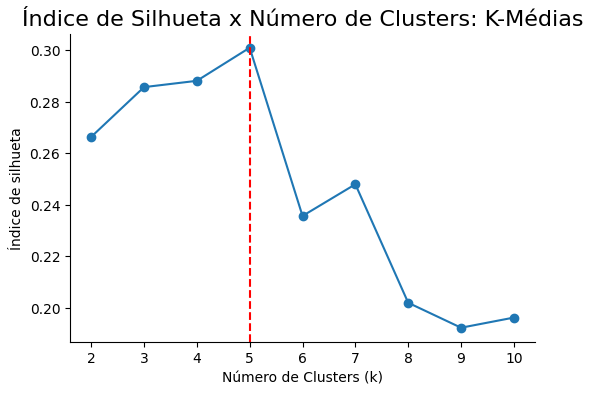

In [66]:
# gerar o gráfico do índice de silhueta do K-Médias
f, ax = plt.subplots(figsize=(6, 4))

ax.plot(range_busca, silhouette_list_kmeans, marker='o')

ax.set_xlabel('Número de Clusters (k)')
ax.set_ylabel('Índice de silhueta')
ax.set_title('Índice de Silhueta x Número de Clusters: K-Médias', fontsize=16)
ax.axvline(x=5, color='red', linestyle='--')

sns.despine()
plt.show()

Continuação da resposta: os códigos abaixo geram o gráfico do Índice de Silhueta para a escolha dos valores ótimos de 'eps' e 'min_samples' para o DBScan. Neste processo, foi aplicado o algoritmo DBScan para diferentes valores de 'eps' e 'min_samples' e calculado o Índice de Silhueta. Os valores ótimos de 'eps' e 'min_samples' foram aqueles cujo Índice de Silhueta foi o mais elevado, condicionado que o algoritmo tenha encontrado mais de um tipo de rótulo (não apenas um cluster único ou só ruído) e que há mais de um cluster válido (descontando o ruído), pois não faz sentido gerar apenas um cluster. Neste caso, como mostrado na questão anterior, os valores ótimos de 'eps' e 'min_samples' foram 1.35 e 5, respectivamente, os quais geram 2 clusters e Índice de Silhueta de 0,21, menor que o índice do K-Médias.

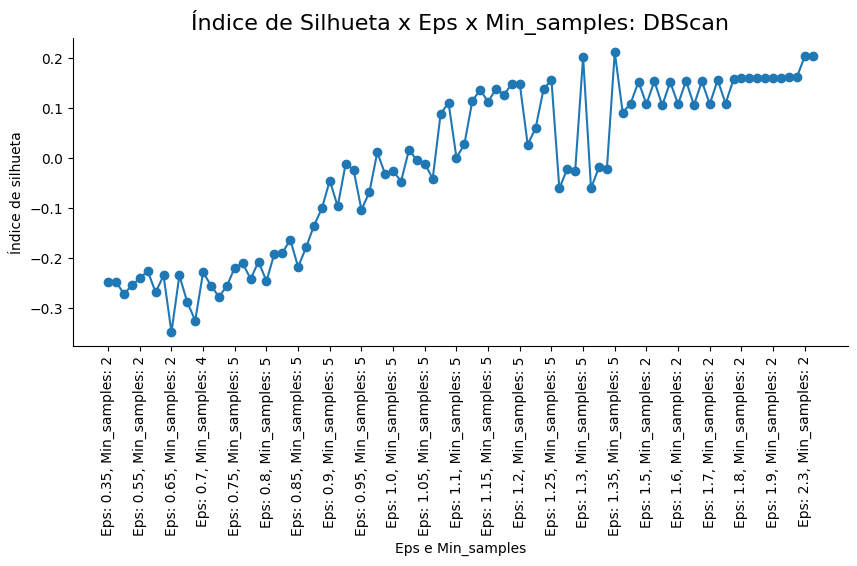

In [67]:
# filtrar apenas os parametros
parametros_dbscan = [f'Eps: {round(item["eps"],2)}, Min_samples: {round(item["min_samples"],2)}' for item in silhouette_list_dbscan]

# filtrar apenas os índices de silhueta
indices_dbscan = [item["score"] for item in silhouette_list_dbscan]

# gerar o gráfico do índice de silhueta do DBScan
f, ax = plt.subplots(figsize=(10, 4))

ax.plot(parametros_dbscan, indices_dbscan, marker='o')

ax.set_xlabel('Eps e Min_samples')
ax.set_ylabel('Índice de silhueta')
ax.set_title('Índice de Silhueta x Eps x Min_samples: DBScan', fontsize=16)

# Mostra apenas a cada 20 observações
step = 4
ax.set_xticks(range(0, len(parametros_dbscan), step))
ax.set_xticklabels(parametros_dbscan[::step], rotation=90)

sns.despine()
plt.show()

Continuação da resposta: o Índice de Silhueta avalia a qualidade da clusterização comparando a coesão (quão próximo um ponto está dos outros do mesmo cluster) e a separação (quão distante está dos pontos de clusters diferentes) e varia de -1 a 1. Valores próximos de +1 indicam clusters bem definidos, valores próximos de 0 indicam sobreposição entre clusters e valores negativos sugerem que o ponto foi atribuído ao cluster errado. Ele é calculado da seguinte forma:
1. Coesão ($a(i)$): calcula-se a distância média entre o ponto $i$ e todos os outros pontos do mesmo cluster. Isso representa o quão bem o ponto está inserido no seu cluster;
2. Separação ($b(i)$): calcula-se a menor distância média entre o ponto $i$ e os pontos de outros clusters. Representa o quão distante o ponto está dos clusters vizinhos;
3. Cálculo da Silhueta individual:
$$
s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}
$$
4. Índice de Silhueta global: é a média de todos os valores $s(i)$, sendo usado para avaliar a qualidade geral da clusterização.

Em se tratando da justificativa para o número de clusters escolhidos, para o algoritmo K-Médias foram escolhidos 5 clusters, ao passo que para o algoritmo DBScan foram escolhidos valores ótimos de 'eps' e 'min_samples' que geraram 2 clusters. Em ambos os casos, a escolha decorreu do fato do Índice de Silhueta ter apresentado o maior valor para o número de clusters escolhidos, indicando clusters mais coesos e bem separados. Outras combinações geraram índices menores, com clusters não tão bem definidos. 

**3. Compare os dois resultados, aponte as semelhanças e diferenças e interprete.**

Resposta: no caso do K-Médias, a escolha de 5 clusters mostra que houve separação dos elementos, gerando informação a ser interpretada pelo pesquisador. O gráfico abaixo mostra os países agrupados pelos clusters gerados por meio do K-Médias, juntamente com a renda deles. Apesar da renda não ter sido a única variável utilizada na clusterização, escolheu-se mostrar os clusters por meio dessa variável pela importância que a mesma possui, afetando outras variáveis utilizadas no estudo, como indicadores de saúde (mortalidade infantil, expectativa de vida e gastos com saúde) e importações. Além disso, o gráfico com essa variável é mais intuitivo do que plotar os países em função de dois componentes principais, como os gerados pelo PCA, uma vez que estes representam combinações lineares das variáveis.

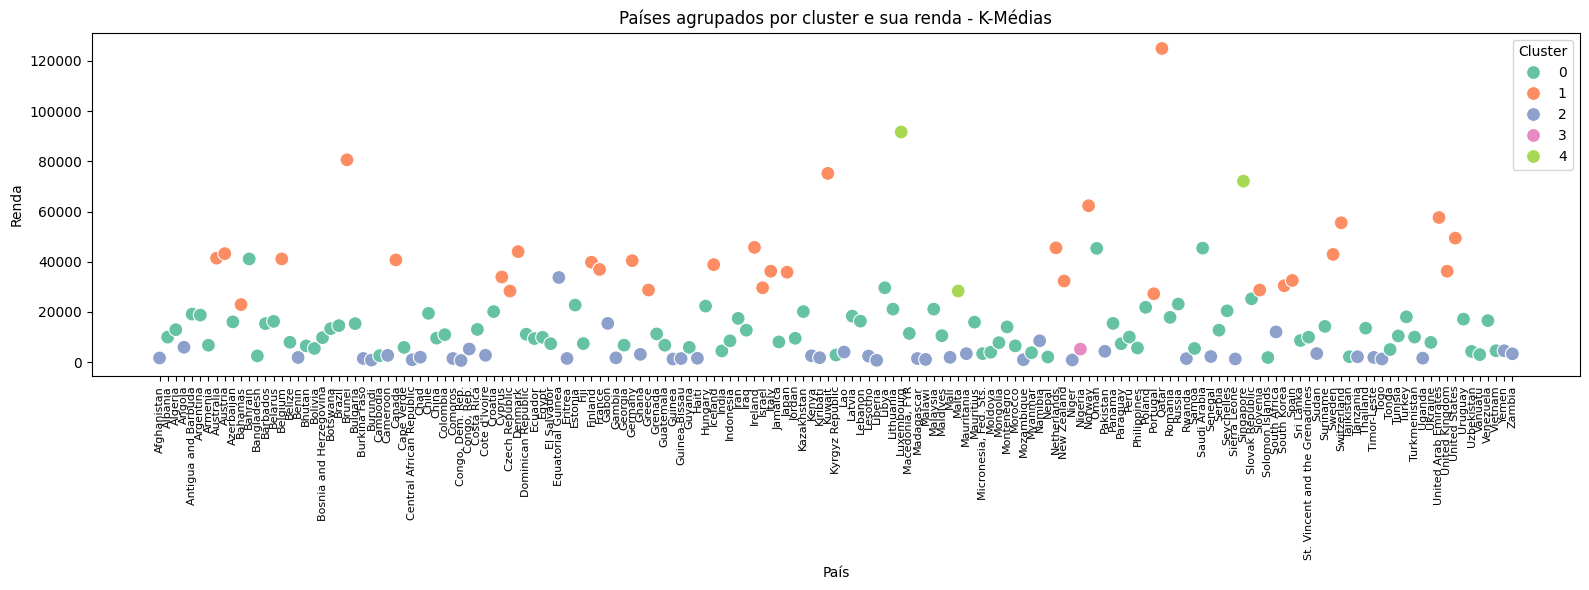

In [68]:
# criar dataframe com país, renda e cluster
ordena_renda_kmedias = pd.DataFrame({'country': paises['country'], 'income': paises['income'], "nr_cluster_kmedias": valor_otimo_kmedias.labels_})

# gráficos dos países x cluster x renda
plt.figure(figsize=(16,6))
sns.scatterplot(
    data=ordena_renda_kmedias,
    x="country",
    y="income",
    hue="nr_cluster_kmedias",
    palette="Set2",
    s=100
)

plt.xticks(rotation=90, fontsize=8)
plt.title("Países agrupados por cluster e sua renda - K-Médias")
plt.xlabel("País")
plt.ylabel("Renda")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

Continuação da resposta: pelo gráfico anterior, nota-se que o cluster 0 (zero) possui muitos países com renda intermediária, incluindo o Brasil, o cluster 1 engloba países com renda mais alta, como os EUA, o cluster 2 contempla países de renda mais baixa, como Afeganistão, o cluster 3 é formado por um único país (Nigéria) e o cluster 4 possui apenas 3 países com alta renda (Malta, Luxemburgo e Singapura).

O código a seguir mostra a quantidade de clusters e de ruídos gerados pelo algoritmo DBScan.

In [69]:
# calcular a quantidade de clusters e de ruídos gerados
labels = valor_otimo_dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Número de clusters:", n_clusters)
print("Número de pontos de ruído:", n_noise)

Número de clusters: 2
Número de pontos de ruído: 42


Continuação da resposta: o gráfico a seguir mostra os países agrupados por renda e pelo cluster atribuído pelo DBScan. Nota-se que foram criados apenas 2 clusters: o cluster 0 (zero), que é formado por países de baixa renda, como Uganda, e o cluster 1, que é formado por países de renda média ou alta, como Brasil e Canadá. Há também os países que não pertencem a nenhum cluster, rotulados como -1, os quais não tem vizinhos suficientes dentro do raio ('eps') para formar um cluster.

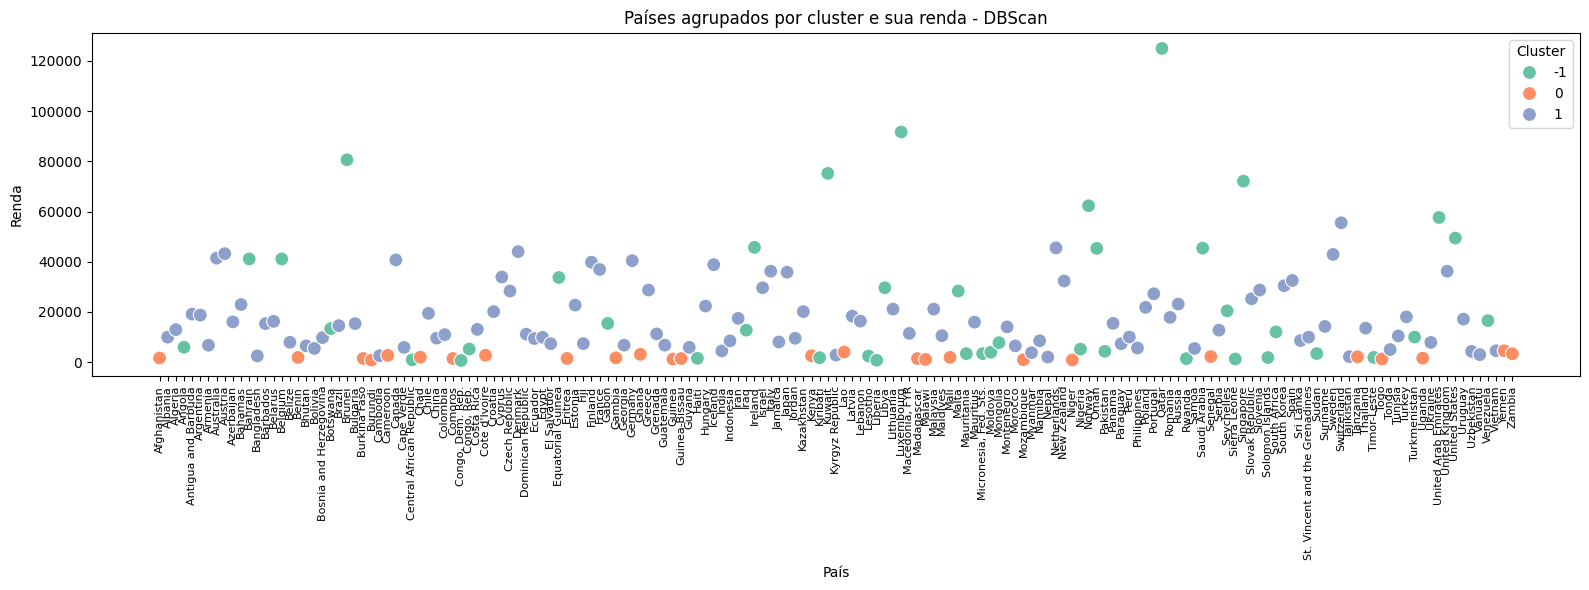

In [70]:
# criar dataframe com país, renda e cluster
ordena_renda_dbscan = pd.DataFrame({'country': paises['country'], 'income': paises['income'], "nr_cluster_dbscan": valor_otimo_dbscan.labels_})

# gráficos dos países x cluster x renda
plt.figure(figsize=(16,6))
sns.scatterplot(
    data=ordena_renda_dbscan,
    x="country",
    y="income",
    hue="nr_cluster_dbscan",
    palette="Set2",
    s=100
)

plt.xticks(rotation=90, fontsize=8)
plt.title("Países agrupados por cluster e sua renda - DBScan")
plt.xlabel("País")
plt.ylabel("Renda")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

Continuação da resposta: o código abaixo cria uma tabela com as clusterizações geradas pelo K-Médias e pelo DBScan.

In [ ]:
# transformar a coluna de país para caracter
ordena_renda_dbscan['country'] = ordena_renda_dbscan['country'].astype(str)
ordena_renda_kmedias['country'] = ordena_renda_kmedias['country'].astype(str)

# unir as bases
unidos = ordena_renda_dbscan[['country','income','nr_cluster_dbscan']].merge(ordena_renda_kmedias[['country','nr_cluster_kmedias']], on='country')

Continuação da resposta: a semelhança nos clusters gerados pelos dois algoritmos reside no fato de que ambos geraram um cluster com países de baixa renda. O código abaixo mostra que o  cluster 2 (baixa renda) do K-Médias possui 44 países, ao passo que o cluster 0 do DBScan possui 26 países. Ao se verificar os países que foram classificados no cluster de baixa renda tanto pelo K-Médias quanto pelo DBScan, verifica-se que todos os 26 países classificados pelo DBScan também foram classificados como de baixa renda pelo K-Médias, o que reforça a avaliação de que estes países realmente formam um cluster.

Já as diferenças entre os resultados gerados pelos dois algoritmos residem na quantidade de clusters, pois o K-Médias gerou mais clusters, inclusive separando países de alta e média renda, ao passo que o DBScan juntou esses países em um único cluster. Além disso, o Índice de Silhueta do K-Médias também foi mais alto (0,30 ante 0,21 do DBScan), o que indica que os clusters gerados pelo K-Médias estão melhor definidos.

In [71]:
# verificar a quantidade de países no cluster 2 (países de baixa renda)
unidos_filtro_baixa_renda_kmedias = unidos[unidos['nr_cluster_kmedias']==2]
print(f'Quantidade de países no cluster 2 do K-Médias: {unidos_filtro_baixa_renda_kmedias.shape[0]}')

# verificar a quantidade de países no cluster 0 (países de baixa renda)
unidos_filtro_baixa_renda_dbscan = unidos[unidos['nr_cluster_dbscan']==0]
print(f'Quantidade de países no cluster 0 do DBScan: {unidos_filtro_baixa_renda_dbscan.shape[0]}')

# verificar a quantidade de países que foram classificados no cluster 2 pelo K-Médias e no cluster 0 pelo DBScan
unidos_filtro_baixa_renda_todos = unidos[(unidos['nr_cluster_dbscan']==0) & (unidos['nr_cluster_kmedias'] == 2)]
print(f'Quantidade de países no cluster 2 do K-Médias e no cluster 0 do DBScan: {unidos_filtro_baixa_renda_todos.shape[0]}')

Quantidade de países no cluster 2 do K-Médias: 44
Quantidade de países no cluster 0 do DBScan: 26
Quantidade de países no cluster 2 do K-Médias e no cluster 0 do DBScan: 26


**4. Escolha mais duas medidas de validação para comparar com o índice de silhueta e analise os resultados encontrados. Observe, para a escolha, medidas adequadas aos algoritmos.**

Resposta: foram escolhidos os índices de Davies–Bouldin (DBI) e Calinski–Harabasz (CHI). O Within-Cluster Sum of Squares (WSS) não foi escolhido por ser um índice aplicável apenas ao resultado do K-Médias, não sendo possível compará-lo com os resultados do DBScan. O código abaixo gera os índices para os dois resultados de clusterização. Na comparação entre os algoritmos, o K-Médias mostra vantagem. O Índice de Calinski-Harabasz foi superior para o K-Médias, sendo que a interpretação do mesmo é quanto maior, melhor. E o Índice de Davies-Bouldin foi menor para o K-Médias, sendo que a sua interpretação é quanto menor, melhor. Conclusão: a clusterização gerada pelo K-Médias para este conjunto de dados foi superior à clusterização gerada pelo DBScan, conforme os índices avaliados (Silhueta, Calinski-Harabasz e Davies-Bouldin).

In [74]:
# importar os índices
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

# calcular os índices para o resultado do K-Médias
ch_kmedias = calinski_harabasz_score(df_scaled, valor_otimo_kmedias.labels_)
db_kmedias = davies_bouldin_score(df_scaled, valor_otimo_kmedias.labels_)

# imprimir os resultados
print(f'Índice de Calinski-Harabasz para o K-Médias: {ch_kmedias}')
print(f'Índice de Davies-Bouldin para o K-Médias: {db_kmedias}')

# calcular os índices para o resultado do DBScan
ch_dbscan = calinski_harabasz_score(df_scaled, valor_otimo_dbscan.labels_)
db_dbscan = davies_bouldin_score(df_scaled, valor_otimo_dbscan.labels_)

# imprimir os resultados
print(f'Índice de Calinski-Harabasz para o DBScan: {ch_dbscan}')
print(f'Índice de Davies-Bouldin para o DBScan: {db_dbscan}')

Índice de Calinski-Harabasz para o K-Médias: 57.62252356062451
Índice de Davies-Bouldin para o K-Médias: 0.8671489714172458
Índice de Calinski-Harabasz para o DBScan: 23.88192806314665
Índice de Davies-Bouldin para o DBScan: 2.5838887163013826


**5. Realizando a análise, responda: A silhueta é um o índice indicado para escolher o número de clusters para o algoritmo de DBScan?**

Resposta: o índice de silhueta não é indicado para escolher o número de clusters no DBScan, pois esse algoritmo determina automaticamente a quantidade de clusters a partir dos parâmetros 'eps' e 'min_samples'. A silhueta pode ser usada apenas como métrica de avaliação da qualidade dos clusters obtidos, mas não como critério de escolha do número de clusters. Como exemplo, na primeira tentativa de se encontrar os valores ótimos de 'eps' e 'min_samples' para este trabalho, os valores escolhidos eram aqueles que geraram um Índice de Silhueta de 0,63, bem superior ao valor obtido pelo modelo escolhido para o trabalho (0,21). Porém, este valor de 0,63 foi obtido com a geração de um único cluster e um ruído, o que não tem nenhuma utilidade prática, pois todos os países estariam dentro de um cluster, não haveria informação a ser avaliada. Após alterações no código, realizou-se a filtragem do maior Índice de Silhueta condicionado que houvesse mais de um cluster.

# Medidas de similaridade

**1. Um determinado problema, apresenta 10 séries temporais distintas. Gostaríamos de agrupá-las em 3 grupos, de acordo com um critério de similaridade, baseado no valor máximo de correlação cruzada entre elas. Descreva em tópicos todos os passos necessários.**

Resposta: os passos necessários são os seguintes:  
1. Reunir as 10 séries temporais em um formato adequado, como DataFrame;
2. Garantir que todas tenham o mesmo comprimento. Se necessário, aplicar técnicas de interpolação;
3. Escalonar as séries para evitar que diferenças de escala influenciem a correlação;
4. Para cada par de séries temporais, calcular a correlação cruzada em diferentes defasagens (lags);
5. Extrair o valor máximo da correlação cruzada para cada par;
6. Construir uma matriz de similaridade, onde cada célula representa a correlação cruzada entre duas séries;
7. Como algoritmos de agrupamento geralmente trabalham com distâncias, transformar a matriz de similaridade em uma matriz de distância: $d_{ij} = 1 - max\_corr(i,j)$. Assim, valores próximos de 0 indicam séries altamente correlacionadas;
8. Definir que deseja-se 3 grupos;
9. Selecionar um algoritmo de clusterização adequado, como K-Medoids (PAM), que é robusto para matrizes de distância, ou a Clusterização Hierárquica, que permite visualizar o dendograma e cortar em 3 grupos;
10. Aplicar o algoritmo escolhido sobre a matriz de distância;
11. Obter a atribuição de cada série temporal a um dos 3 clusters;
12. Avaliar a qualidade dos agrupamentos utilizando, por exemplo, o Índice de Silhueta, o Índice de Davies–Bouldin (DBI) e/ou o Índice de Calinski–Harabasz (CHI);
13. Interpretar se os grupos fazem sentido em termos de similaridade temporal; e 
14. Relacionar os resultados com o contexto do problema.

**2. Para o problema da questão anterior, indique qual algoritmo de clusterização você usaria. Justifique.**

Resposta: eu utilizaria o algoritmo K-Medoids (PAM), pois trabalha diretamente com matrizes de distância derivadas da correlação cruzada, não exigindo que os dados estejam em um espaço vetorial euclidiano. Além disso, é robusto a outliers, o que é importante em séries temporais, já que algumas podem ter padrões muito distintos. Por fim, ele permite especificar o número de clusters desejado (3 nesse caso).

**3. Indique um caso de uso para essa solução projetada.**

Resposta: um caso de uso para essa solução seria quando se tem muitas séries temporais econômicas e sociais de um país, como séries de inflação, renda, desemprego, mortalidade infantil, entre outras, e se deseja criar um modelo de regressão linear para projetar uma determinada série. Neste tipo de modelo, o ideal é evitar incluir variáveis explicativas que sejam muito correlacionadas entre si, pois as  mesmas não auxiliariam a explicar a variável dependente, sendo que a inclusão de apenas uma delas já seria suficiente. A solução projetada pode identificar as séries que seriam muito correlacionadas entre si e, desta forma, auxiliar na escolha das variáveis que poderiam gerar um modelo de regressão com melhor desempenho.

**4. Sugira outra estratégia para medir a similaridade entre séries temporais. Descreva em tópicos os passos necessários.**

Resposta: outra estratégia seria utilizar Dynamic Time Warping (DTW). Essa técnica consegue comparar séries que podem estar deslocadas no tempo ou ter velocidades diferentes, mas ainda assim apresentam padrões semelhantes. Os passos necessários seriam os seguintes:
1. Organizar as séries temporais em formato adequado, como DataFrame;
2. Normalizar ou padronizar os valores, se necessário, para evitar que diferenças de escala distorçam a medida de similaridade;
3. Para cada par de séries temporais, aplicar o algoritmo DTW. Este algoritmo alinha as séries de forma não linear, permitindo que pontos semelhantes sejam comparados mesmo que ocorram em momentos diferentes. O algoritmo compreende as seguintes etapas: a) considerando duas variáveis, $x$ e $y$, com comprimentos $n$ e $m$, contruir uma matriz onde cada célula representa o custo local de alinhar $x_i$ com $y_i$. Normalmente, esse custo é a distância euclidiana; b) definir o caminho de alinhamento, que vai da célula (1,1) até ($n$,$m$). O custo acumulado é calculado recursivamente: $D(i,j) = c(i,j) + min\{D(i-1,j), D(i,j-1), D(i-1,j-1)\}$; e c) a distância DTW é o custo acumulado mínimo ao chegar em $(n,m)$: $DTW(X,Y) = D(n,m)$. O resultado é uma distância DTW que indica quão semelhantes são cada par de séries;
4. Formar uma matriz, onde cada célula representa a distância DTW entre duas séries;
5. Usar a matriz de distância como entrada para um algoritmo de agrupamento, como K-Medoids ou Clusterização Hierárquica;
6. Definir o número de clusters desejado (3, no caso);
7. Obter os grupos de séries temporais com base na similaridade DTW;
8. Avaliar a qualidade dos agrupamentos utilizando, por exemplo, o Índice de Silhueta, o Índice de Davies–Bouldin (DBI) e/ou o Índice de Calinski–Harabasz (CHI); e
9. Interpretar os clusters para verificar se séries com padrões semelhantes foram agrupadas corretamente.
